## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = merged_data['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data[['Mouse ID', 'Timepoint']].value_counts()

merged_data.set_index(['Mouse ID'])

clean_data = merged_data.loc[merged_data["Mouse ID"] != 'g989']

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = merged_data.loc[merged_data["Mouse ID"] == 'g989']
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_data['Drug Regimen'].value_counts()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_drug = clean_data.groupby("Drug Regimen")

mean = grouped_drug['Tumor Volume (mm3)'].mean()
#print(mean)
median = grouped_drug['Tumor Volume (mm3)'].median()
#print(median)
variance = grouped_drug['Tumor Volume (mm3)'].var()
#print(variance)
STD = grouped_drug['Tumor Volume (mm3)'].std()
#print(STD)
SEM = grouped_drug['Tumor Volume (mm3)'].sem()
#print(SEM)

sum_stats = pd.DataFrame({'Mean': mean,
              'Median': median,
              'Variance': variance,
              'Standard Deviation': STD,
              'SEM': SEM})
sums_stats = sum_stats.index.name=None
sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

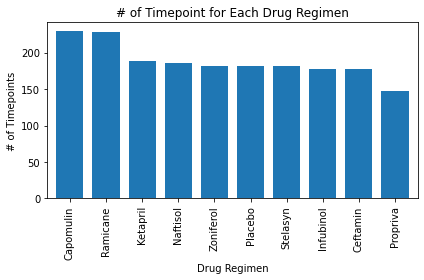

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

drugs = clean_data['Drug Regimen'].value_counts()

drugs.plot(kind='bar', 
           width=.75)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.title('# of Timepoint for Each Drug Regimen')
plt.tight_layout()


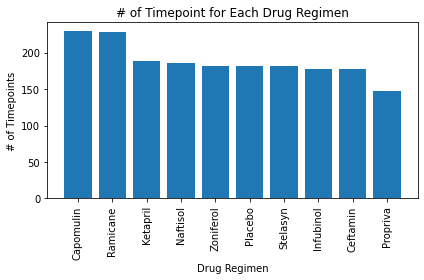

In [10]:
# Generate a bar plot showing the total number of timepoints 
#for all mice tested for each drug regimen using pyplot.

drugs = clean_data['Drug Regimen'].value_counts()
plt.bar(drugs.index.values,drugs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.title('# of Timepoint for Each Drug Regimen')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of \n Female to Male')

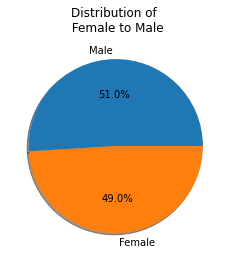

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Panda
pie_data = clean_data['Sex'].value_counts()
pie_data
pie_data.plot(kind='pie',
             autopct='%1.1f%%',
             shadow=True)
plt.ylabel("")
plt.title(f'Distribution of \n Female to Male')

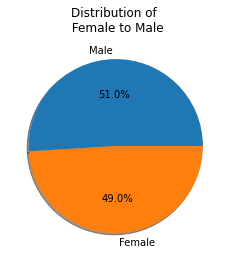

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels = ['Female', 'Male']

pie_data = clean_data['Sex'].value_counts()
plt.pie(pie_data.values,
        labels=pie_data.index.values, 
        autopct='%1.1f%%', 
        shadow=True)
plt.title(f'Distribution of \n Female to Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

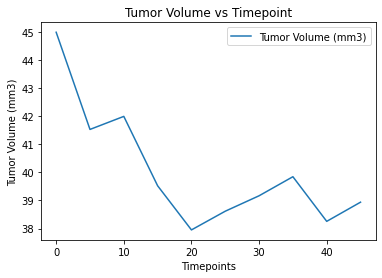

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b742 = clean_data.loc[clean_data["Mouse ID"] == 'b742']

b742.plot.line('Timepoint', 'Tumor Volume (mm3)')

plt.title('Tumor Volume vs Timepoint')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')

<AxesSubplot:xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

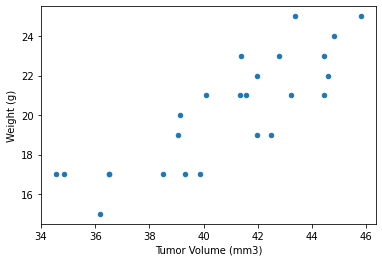

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

mouse = capo.groupby('Mouse ID').mean()

mouse.plot.scatter('Tumor Volume (mm3)', 'Weight (g)')


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

tumor = mouse['Tumor Volume (mm3)']
weight = mouse["Weight (g)"]
correlation = st.pearsonr(tumor,weight)
print(f"Correlation coefficient = {round(correlation[0],2)}")



Correlation coefficient = 0.84


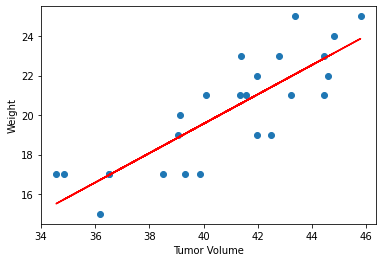

In [19]:
x_values = mouse['Tumor Volume (mm3)']
y_values = mouse['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.show()